# Homework #8. Dimesionality Reduction

## Task 1

Можно ли отобрать наиболее значимые признаки с помощью PCA?

# Self-study #8. Summation

## Task 1

(*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [398]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

#### Связь PCA и SVD
$X = UDV^T$
$$$$
$ Cov(X) = XX^T = (UD V^T)^T(U D V^T) $, $ U^TU = 1, D^TD = \Lambda $   =>  $ Cov(X) = V\Lambda V^T$
$$$$
$$$$
$Z = XW = XV = UDV^TV = UD $

In [4]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.std = None
        
    def fit(self, X):
        X_ = X.astype(float)
        
        self.mean = np.mean(X_, axis=0)

        X_ -= self.mean

        self.std = np.std(X_, axis=0)
        X_ /= self.std
                
        # Сингулярное разложение матрицы ковариации
        U, D, VT = np.linalg.svd(X_)
        m, n = X_.shape
        sigma = np.zeros((m, n))
        for i in range(min(m, n)):
            sigma[i, i] = D[i]

        lambdas = sigma.T.dot(sigma)
        covariance_matrix = VT.T.dot(lambdas.dot(VT))
        
        eigvals, eigvecs = np.linalg.eig(covariance_matrix)
        
        eigvecs = eigvecs.T
        idxs = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idxs]
        eigvecs = eigvecs[idxs]
        
        self.components = eigvecs[0:self.n_components]
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


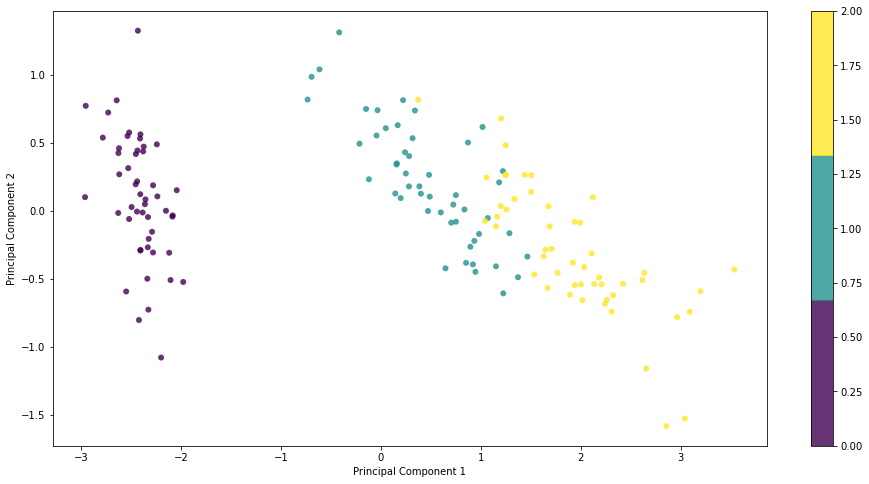

In [401]:
data = datasets.load_iris()
X, y = data.data, data.target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print(f'Shape of X: {X.shape}')
print(f'Shape of transformed X: {X_projected.shape}')

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.figure(figsize=(16, 8))
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Поправьте, если что не так, пожалуйста. 

## Task 2

(*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [404]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal 96.67%


In [405]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size = 0.2, random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal 90.0%


## Task 3

(*) Принять участие в одном или двух соревнованиях и прислать свой псевдоним на Kaggle и ссылку на github с решением задачи.

по регрессии (https://www.kaggle.com/c/tutors-expected-math-exam-results)

или классификации (https://www.kaggle.com/c/choose-tutors).

В скрипте можно использовать только эти импорты:

**Не бесконечный список**

1. **Загрузка данных**
2. **EDA**
2.1. Анализ целевого признака
2.2. Анализ вещественных признаков
2.3. Анализ категориальных признаков
2.4. Корреляции
3. **Предобработка данных**
3.1. Обработка выбросов
3.2. Обработка пропусков
3.3. Построение новых признаков
.Отбор признаков
6. **Разбиение на train и test**
7. **Построение модели**
8. **Прогнозирование на тестовом датасете**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных 

In [2]:
train = pd.read_csv('tutors-expected-math-exam-results/train.csv')
test = pd.read_csv('tutors-expected-math-exam-results/test.csv')
x_cols = ['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']
y_col = 'mean_exam_points'

## EDA 

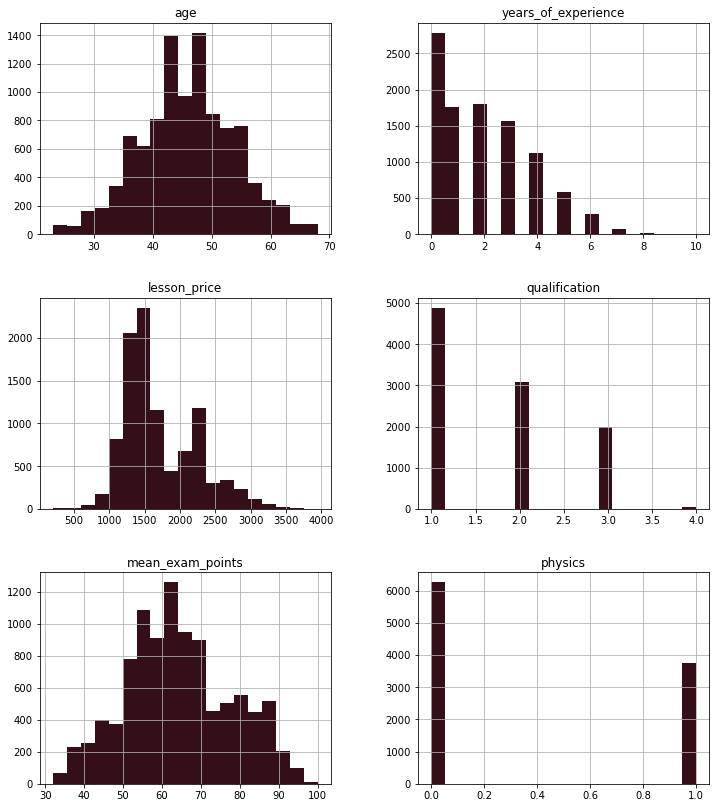

In [3]:
cols = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'mean_exam_points', 'physics']
color = '#340f18'
train[cols].hist(figsize =(12,14), bins = 19, color=color)
plt.show()

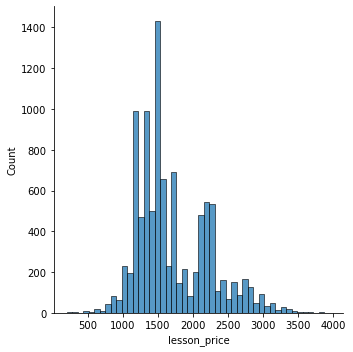

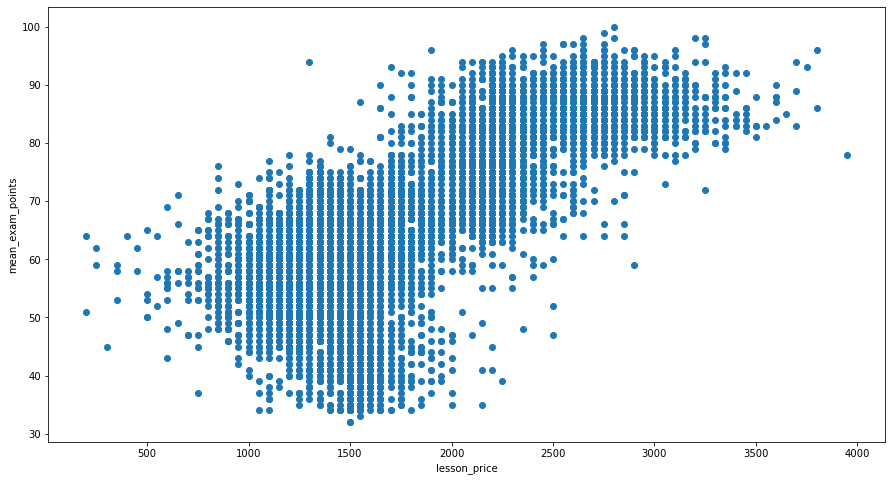

In [69]:
plt.figure(figsize=(15, 8))
plt.scatter(train['lesson_price'], train[y_col])
plt.ylabel('mean_exam_points')
plt.xlabel('lesson_price')
plt.show()

In [52]:
train['lesson_price'].quantile(0.985), train['lesson_price'].quantile(.05)

(3050.0, 1100.0)

### Анализ целевого признака

### Анализ вещественных признаков

In [106]:
train.columns

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

### Анализ категориальных признаков

In [107]:
categ_features = ['physics', 'chemistry', 'biology', 'english', 'geography', 'history']

In [111]:
for feat in categ_features:
    print(train[feat].value_counts())

0.0    6250
1.0    3750
Name: physics, dtype: int64
0.0    8671
1.0    1329
Name: chemistry, dtype: int64
0.0    8904
1.0    1096
Name: biology, dtype: int64
0.0    9463
1.0     537
Name: english, dtype: int64
0.0    9679
1.0     321
Name: geography, dtype: int64
0.0    9806
1.0     194
Name: history, dtype: int64


### Корреляции

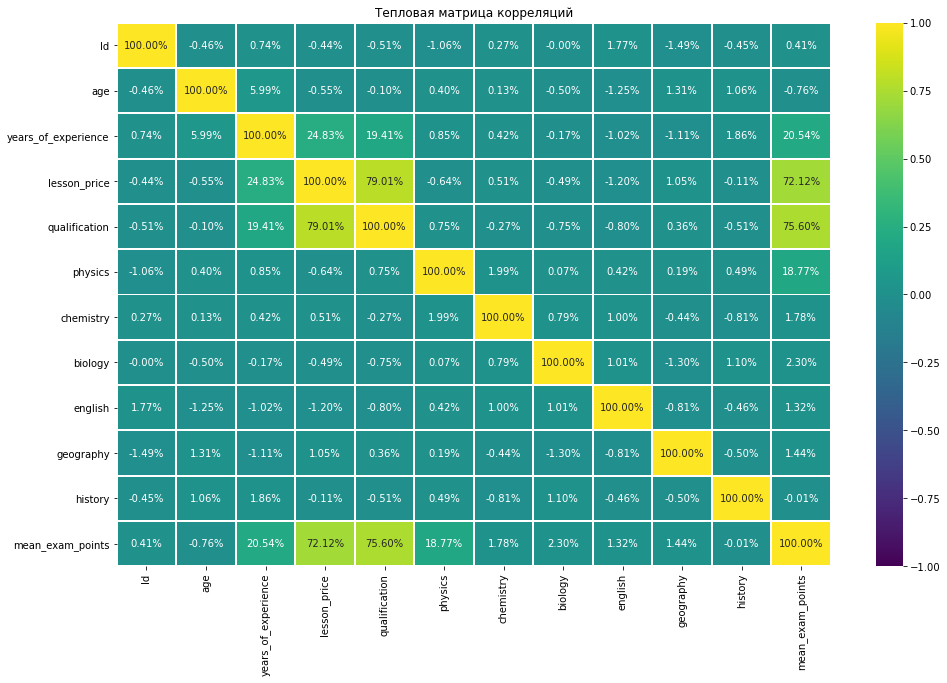

In [94]:
plt.rcParams['figure.figsize'] = (16.0, 10.0)
corr = train.corr()
sns.heatmap(corr, annot = True, fmt='.2%', vmin=-1, vmax=1, center= 0, linewidths = 1, cmap = 'viridis')
plt.title('Тепловая матрица корреляций')
plt.show()

## Предобработка данных

### Обработка выбросов

### Обработка пропусков

### Построение новых признаков 

### Отбор признаков

In [5]:
pca = PCA(3)
pca.fit(train)
X_projected = pca.transform(train)

In [6]:
X_projected

array([[ -162.5886076 ,  -798.70583346, -1676.06852198],
       [  667.33887799,  -848.19657347, -1529.6857127 ],
       [ -280.65040593,  -792.72309647, -1694.12699234],
       ...,
       [ -263.73713315,   832.15898478,  1604.17081229],
       [ -351.563092  ,   835.89653515,  1590.40928261],
       [ -151.046826  ,   825.47713428,  1625.94805225]])

## Разбиение на train и test

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train[x_cols], train['mean_exam_points'], test_size = 0.2, random_state = 0)

In [64]:
X_train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
7389,7389,48.0,0.0,1750.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
9275,9275,54.0,5.0,2200.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2995,2995,35.0,0.0,1200.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5316,5316,37.0,1.0,1600.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
356,356,47.0,4.0,1600.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9225,9225,55.0,6.0,1700.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4859,4859,39.0,2.0,1300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3264,3264,39.0,4.0,1450.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
9845,9845,38.0,0.0,1300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Построение модели

In [54]:
import math
import numpy as np
import pandas as pd

class DecisionTreeRegressor:
    
    def __init__(self, max_depth = None, mode=None, n_features=None, criteria='std', seed=None):
        """
        Decision Tree Regressor builds a tree of decisions using a greedy approach
        of always making the best split available at that time. The best split is 
        decided by minimizing varuous criteria. This class is recursive, training node
        by node to build a full set of decisions.
        Params:
        max_depth (int): maximum number of splits to make in the tree
        mode: If mode='rfnode' the column randomization happens at each node. Otherwise
              the tree will assume all input columns are valid choices
        n_features: The number of columns to include in the models. Only applies if
                    mode='rfnode.' Otherwise n_features = number of columns in data.
                    Options: numeric value (e.g. 4 => 4 columns used)
                             "sqrt" (square root of the number of cols in input data)
                             "div3" (number of input cols divided by 3)
        criteria: Options are "std" (standard deviation) and "mae" (absolute error from mean). 
                  This choice decides how the tree will be optimized. Default: "std"
        seed: Random seed to allow for reproducibility.
        """
        self.tree = self.tree_split()
        self.data_cols = None
        self.max_depth = max_depth
        self.current_depth = 0
        self.criteria = criteria
        self.mode = mode
        self.n_features = n_features
        if seed:
            self._seed = seed
            np.random.seed = seed
    
    # Sub class for handling recursive nodes (only makes sense in the scope of a tree)
    class tree_split:
        """
        A sub class for handling recursive nodes. Each node will contain the value and column
        for the current split, as well as links to the resulting nodes from the split. The 
        results attribute remains empty unless the current node is a leaf. 
        """
        def __init__(self,col=-1,value=None,results=None,label=None,tb=None,fb=None, filt=None):
            self.col=col # column index of criteria being tested
            self.value=value # vlaue necessary to get a true result
            self.results=results # dict of results for a branch, None for everything except endpoints
            self.tb=tb # true decision nodes 
            self.fb=fb # false decision nodes
            self.filt=filt # column filter to see which columns were available
    
    def get_mean_target_value(self, data):
        """
        Returns: A dictionary of target variable counts in the data
        """
        return np.mean(data)
    
    def split_data(self, X, y, colnum, value):
        """
        Returns: Two sets of data from the initial data. Set 1 contains those that passed
        the condition of data[colnum] >= value
        ----------
        Input: The dataset, the column to split on, the value on which to split
        """
        splitter = None
        if isinstance(value, int) or isinstance(value,float):
            splitter = lambda x: x[colnum] >= value
        else:
            splitter = lambda x: x[colnum] == value
        split1 = [i for i,row in enumerate(X) if splitter(row)]
        split2 = [i for i,row in enumerate(X) if not splitter(row)]
        set1X = X[split1]
        set1Y = y[split1]
        set2X = X[split2]
        set2Y = y[split2]
        return set1X, set1Y, set2X, set2Y

    def split_criteria(self, y):
        """
        Returns the criteria we're trying to minimize by splitting.
        Current options are target Mean Absolute Error (from the target 
        mean) or Standard deviation of the target.
        ---
        Input: targets in the split
        Output: Criteria
        """
        if self.criteria == 'mae':
            mu = np.mean(y)
            return np.mean(np.abs(y-mu))
        else:
            return np.std(y) 
        
    def find_number_of_columns(self, X):
        """
        Uses the user input for n_features to decide how many columns should
        be included in each model. Uses the shape of X to decide the final number
        if 'sqrt' is called. 
        ---
        Input: X (array, dataframe, or series)
        """
        if isinstance(self.n_features, int):
            return self.n_features
        if self.n_features == 'sqrt':
            return int(np.sqrt(X.shape[1])+0.5)
        if self.n_features == 'div3':
            return int(X.shape[1]/3+0.5)
        else:
            raise ValueError("Invalid n_features selection")
    
    def randomize_columns(self,X):
        """
        Chooses a set of columns to keep from the input data. These are
        randomly drawn, according the number requested by the user. The data
        is filtered and only the allowed columns are returned, along with the
        filter. 
        ---
        Input: X (array)
        Output: filtered_X (array), filter (array)
        """
        num_col = self.find_number_of_columns(X)
        filt = np.random.choice(np.arange(0,X.shape[1]),num_col,replace=False)
        filtered_X = self.apply_filter(X, filt)
        return filtered_X, filt
    
    def apply_filter(self, X, filt):
        """
        Given X and a filter, only the columns matching the index values
        in filter are returned.
        ---
        Input: X (array), filter (array of column IDs)
        Output: filtered_X (array)
        """
        filtered_X = X.T[filt]
        return filtered_X.T
    
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        """
        Converts 1 dimensional data into a series of rows with 1 columns
        instead of 1 row with many columns.
        """
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        """
        Takes in an input and converts it to a numpy array
        and then checks if it needs to be reshaped for us
        to use it properly
        """
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x
    
    def fit(self, X, y):
        """
        Helper function to wrap the fit method. This makes sure the full nested, 
        recursively built tree gets assigned to the correct variable name and 
        persists after training.
        """
        self.tree = self._fit(X,y)
    
    def _fit(self, X, y, depth=0):
        """
        Builds the decision tree via a greedy approach, checking every possible
        branch for the best current decision. Decision strength is measured by
        reduction in chosen criteria. If no information gain is possible,
        sets a leaf node. Recursive calls to this method allow the nesting. If
        max_depth is met, all further nodes become leaves as well.
        ---
        Input: X (feature matrix), y (labels)
        Output: A nested tree built upon the node class."""
        X = self.convert_to_array(X)
        y = self.pandas_to_numpy(y)

        if len(X) == 0: return tree_split()
        current_score = self.split_criteria(y)

        best_gain = 0.0
        best_criteria = None
        best_sets = None
        
        self.data_cols = X.shape[1]
        
        if self.mode=='rfnode':
            _, cols = self.randomize_columns(X)
        else: 
            cols = [x for x in range(self.data_cols)]        
        
        # Here we go through column by column and try every possible split, measuring the
        # information gain. We keep track of the best split then use that to send the split
        # data sets into the next phase of splitting.
        
        for col in cols:
            column_values = set(X.T[col])
            for value in column_values:
                set1, set1_y, set2, set2_y = self.split_data(X, y, col, value)
                p = float(len(set1)) / len(y)
                gain = current_score - p*self.split_criteria(set1_y) - (1-p)*self.split_criteria(set2_y)
                if gain > best_gain and len(set1_y) and len(set2_y):
                    best_gain = gain
                    best_criteria = (col, value)
                    best_sets = (np.array(set1), np.array(set1_y), np.array(set2), np.array(set2_y))
        
        # Now decide whether it's an endpoint or we need to split again.
        if (self.max_depth and depth < self.max_depth) or not self.max_depth:
            if best_gain > 0:
                self.current_depth += 1
                true_branch = self._fit(best_sets[0], best_sets[1], depth=depth+1)
                false_branch = self._fit(best_sets[2], best_sets[3], depth=depth+1)
                return self.tree_split(col=best_criteria[0], value=best_criteria[1],
                        tb=true_branch, fb=false_branch, filt=cols)
            else:
                return self.tree_split(results=self.get_mean_target_value(y))
        else:
            return self.tree_split(results=self.get_mean_target_value(y))

    def print_tree(self, indent="---"):
        """
        Helper function to make sure the correct tree gets printed.
        ---
        In: indent (how to show splits between nodes)
        """
        self.__original_indent = indent
        self._print_tree_(self.tree, indent)
    
    def _print_tree_(self, tree, indent):
        """
        Goes through node by node and reports the column and value used to split
        at that node. All sub-nodes are drawn in sequence below the node.
        """
        if tree.results: # if this is a end node
            print(str(tree.results))
        else:
            print('Column ' + str(tree.col)+' : '+str(tree.value)+'? ')
            # Print the branches
            print(indent+' True: ', end=' ')
            next_indent = indent+self.__original_indent
            self._print_tree_(tree.tb,indent=next_indent)
            print(indent+' False: ', end=' ')
            self._print_tree_(tree.fb,indent=next_indent)

    def predict(self, newdata):
        """
        Helper function to make sure the correct tree is used to
        make predictions. Also manages multiple rows of input data
        since the tree must predict one at a time.
        ---
        In: new data point of the same structure as the training X.
        Out: numpy array of the resulting predictions
        """
        results = []
        newdata = self.convert_to_array(newdata)
        for x in newdata:
            results.append(self._predict(x,self.tree))
        return np.array(results)
            
    def _predict(self, newdata, tree):
        """
        Uses the reusive structure of the tree to follow each split for
        a new data point. If the node is an endpoint, the mean value of
        all training points at that end is returned.
        """
        if tree.results is not None: # if this is a end node
            return tree.results

        if isinstance(newdata[tree.col], int) or isinstance(newdata[tree.col],float):
            if newdata[tree.col] >= tree.value:
                return self._predict(newdata, tree.tb)

            else:
                return self._predict(newdata, tree.fb)
        else:
            if newdata[tree.col] == tree.value:
                return self._predict(newdata, tree.tb)
            else:
                return self._predict(newdata, tree.fb) 

    def score(self, X, y):
        """
        Uses the predict method to measure the (negative)
        mean squared error of the model.
        ---
        In: X (list or array), feature matrix; y (list or array) labels
        Out: negative mean squared error (float)
        """
        X = self.pandas_to_numpy(X)
        y = self.pandas_to_numpy(y)
        pred = self.predict(X)
        return -1.*np.mean((pred-y)**2)

In [77]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red

        # for leaf node
        self.value = value


class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

In [65]:
class Node:

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

class DecisionTreeRegressor:
  
    def fit(self, X, y, min_leaf = 5):
        self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
        return self

    def predict(self, X):
        return self.dtree.predict(X.values)

regressor = DecisionTreeRegressor().fit(X_train, y_train)
preds = regressor.predict(X_test)
metrics.r2_score(y_test, preds)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([   9,   15,   18,   23,   31,\n            ...\n            7982, 7983, 7986, 7990, 7991],\n           dtype='int64', length=1588). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

## Прогнозирование на тестовом датасете

In [56]:
X = np.array(train[x_cols])
y = np.array(pd.DataFrame(train[y_col]))
X

array([[0.000e+00, 4.000e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 4.800e+01, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 3.900e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [9.997e+03, 3.400e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.998e+03, 3.300e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.999e+03, 3.500e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [78]:
X = train[x_cols]
y = pd.DataFrame(train[y_col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [79]:
X_train, X_test = np.array(train[x_cols]), np.array(test[x_cols])

y_train = np.array(pd.DataFrame(train[y_col]))

In [80]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [81]:
def r2_score(y_pred, y):
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    return 1 - ss_res / ss_total

r2_score(y_pred, np.array(y_test))

-17013.415614331378

In [466]:
class GradientBoostingRegressor:
    def __init__(self, *args, n_trees=100, eta=0.01, sample=1, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
        self.n_trees = n_trees
        self.eta = eta
        self.sample = sample
        self.alg = None
        
        self.train_errors = None
        self.test_errors = None
        
        
    def fit(self, X_train, y_train, X_test=None, y_test=None):
        X_train = pd.DataFrame(X_train)
        y_train = pd.Series(y_train)
        
        self.forest = []

        self.train_errors = []
        self.test_errors = []

        for i in range(self.n_trees):
            alg = DecisionTreeRegressor(*self.args, **self.kwargs)
            
            sample_size = int(X_train.shape[0] * self.sample)
            indexes = np.random.choice(X_train.index, sample_size, replace=False)

            if len(self.forest) == 0:
                alg.fit(X_train.loc[indexes], y_train.loc[indexes])

            else:
                prediction = self.predict(X_train.loc[indexes])
                alg.fit(X_train.loc[indexes], self.bias(y_train.loc[indexes], prediction))
                
            self.forest.append(alg)
            
            self.train_errors.append(mse(y_train, self.predict(X_train)))
            if X_test and y_test:
                self.test_errors.append(mse(y_test, self.predict(X_test)))
    
    def predict(self, X):
        return np.sum([self.eta * alg.predict(X) for alg in self.forest], axis=0)
    
    def r2_score(self, y_pred, y):
        ss_total = np.sum((y - np.mean(y))**2)
        ss_res = np.sum((y - y_pred)**2)
        return 1 - ss_res / ss_total
        
   
    @staticmethod
    def bias(y, z):
        return (y - z)

In [7]:
train = pd.read_csv('tutors-expected-math-exam-results/train.csv')
test = pd.read_csv('tutors-expected-math-exam-results/test.csv')
x_cols = ['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']
y_col = 'mean_exam_points'

X_train, X_test = np.array(train[x_cols]), np.array(test[x_cols])

y_train = np.array(pd.DataFrame(train[y_col]))

In [476]:
# pca = PCA(2)
# pca.fit(X_train)
# X_projected = pca.transform(X_train)

# X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size = 0.2, random_state = 0)

model = GradientBoostingRegressor(n_trees=300, sample=0.5, max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + '%')

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [9]:
X_train[:, :2]

array([[0.000e+00, 4.000e+01],
       [1.000e+00, 4.800e+01],
       [2.000e+00, 3.900e+01],
       ...,
       [9.997e+03, 3.400e+01],
       [9.998e+03, 3.300e+01],
       [9.999e+03, 3.500e+01]])